**Exercise 9.11**.  Simulate an MA(1) process with $\theta = 0.6$ and $\mu = 100$.  Simulate 36 values but set aside the last 4 values to compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$ and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series. Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the four forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [3]:
np.random.seed(2000)
Y = generate_arima(theta=0.6, n=36) + 100

**(a)**

In [4]:
model = ARIMA(Y[:32], order=(0, 0, 1)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 1)   Log Likelihood                 -45.735
Method:                           mle   S.D. of innovations              0.957
Date:                Wed, 13 May 2020   AIC                             97.470
Time:                        22:49:25   BIC                            101.867
Sample:                             0   HQIC                            98.928
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8990      0.017   5712.202      0.000      99.865      99.933
ma.L1.y       -0.9999      0.090    -11.163      0.000      -1.176      -0.824
                                    Roots           

**(b)**

In [5]:
Y_pred, se, _ = model.forecast(steps=4)

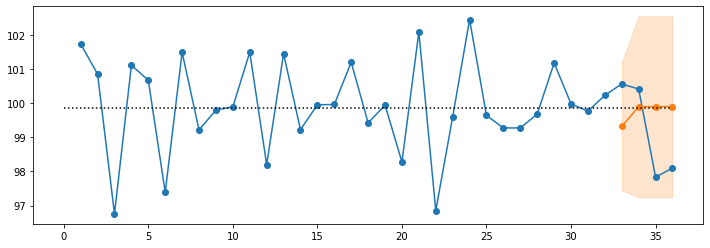

In [6]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)** The actual values are within the predicted values -- also note that the predictions are just the process mean beyond the first lag.

**(d)**  See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 1)   Log Likelihood                 -44.953
Method:                           mle   S.D. of innovations              0.934
Date:                Wed, 13 May 2020   AIC                             95.906
Time:                        22:49:26   BIC                            100.303
Sample:                             0   HQIC                            97.364
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9972      0.017   5859.273      0.000      99.964     100.031
ma.L1.y       -0.9999      0.152     -6.586      0.000      -1.298      -0.702
                                    Roots           

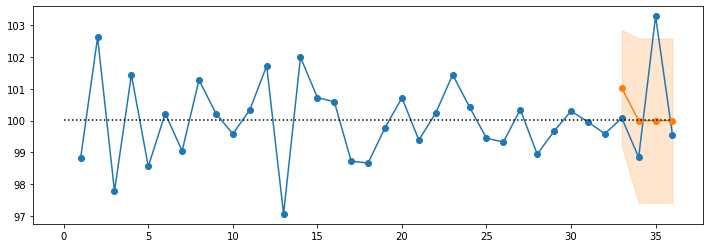

In [7]:
np.random.seed(2001)
Y = generate_arima(theta=0.6, n=36) + 100

model = ARIMA(Y[:32], order=(0, 0, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=4)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

One of the actual points is outside of the confidence interval; it does seem as an outlier compared with the rest of the process.

**Exercise 9.12**.  Simulate an MA(2) process with $\theta_1 = 1$, $\theta_2 = −0.6$, and $\mu = 100$.  Simulate 36 values but set aside the last 4 values with compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$'s and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series.  Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** What is special about the forecasts at lead times 3 and 4?

**(d)** Compare the four forecasts with the actual values that you set aside.

**(e)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(f)** Repeat parts (a) through (e) with a new simulated series using the same values
of the parameters and same sample size.

**Solution**.

In [8]:
np.random.seed(2000)
Y = generate_arima(theta=[1, -0.6], n=36) + 100

**(a)**

In [9]:
model = ARIMA(Y[:32], order=(0, 0, 2)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 2)   Log Likelihood                 -46.307
Method:                           mle   S.D. of innovations              0.975
Date:                Wed, 13 May 2020   AIC                            100.615
Time:                        22:49:26   BIC                            106.478
Sample:                             0   HQIC                           102.558
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8713      0.079   1270.114      0.000      99.717     100.025
ma.L1.y       -1.3919      0.248     -5.604      0.000      -1.879      -0.905
ma.L2.y        0.8544      0.272      3.139      0.0

**(b)**

In [10]:
Y_pred, se, _ = model.forecast(steps=4)

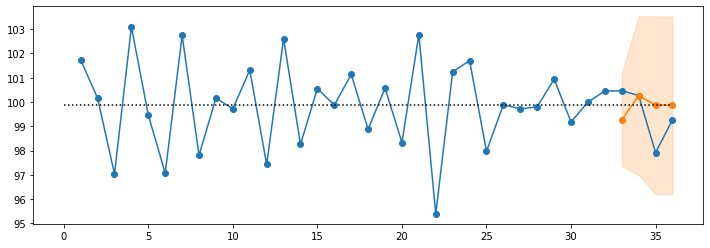

In [11]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c, d, e)** The values are within the confidence interval.  The predicted values past lag 2 are the process mean.

**(f)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 2)   Log Likelihood                 -45.779
Method:                           mle   S.D. of innovations              0.993
Date:                Wed, 13 May 2020   AIC                             99.558
Time:                        22:49:26   BIC                            105.421
Sample:                             0   HQIC                           101.502
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9737      0.110    909.224      0.000      99.758     100.189
ma.L1.y       -0.9318      0.135     -6.922      0.000      -1.196      -0.668
ma.L2.y        0.5619      0.175      3.207      0.0

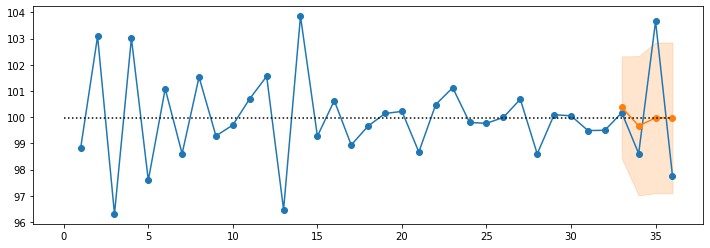

In [12]:
np.random.seed(2001)
Y = generate_arima(theta=[1, -0.6], n=36) + 100

model = ARIMA(Y[:32], order=(0, 0, 2)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=4)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

One value seems like an outlier -- and it falls outside of the confidence interval.

**Exercise 9.13**. Simulate an ARMA(1,1) process with $\phi = 0.7$, $\theta = −0.5$, and $\mu = 100$.  Simulate 50 values but set aside the last 10 values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$, $\theta$, and $\mu$.

**(b)** Using the estimated model, forecast the next ten values of the series.  Plot the series together with the ten forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the ten forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [13]:
np.random.seed(2000)
Y = generate_arima(phi=0.7, theta=-0.5, n=50) + 100

**(a)**

In [14]:
model = ARIMA(Y[:40], order=(1, 0, 1)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 1)   Log Likelihood                 -62.225
Method:                           mle   S.D. of innovations              1.130
Date:                Wed, 13 May 2020   AIC                            132.450
Time:                        22:49:26   BIC                            139.206
Sample:                             0   HQIC                           134.893
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1563      0.490    202.477      0.000      98.196     100.116
ar.L1.y        0.4284      0.161      2.657      0.008       0.112       0.744
ma.L1.y        0.6083      0.128      4.745      0.0

**(b)**

In [15]:
Y_pred, se, _ = model.forecast(steps=10)

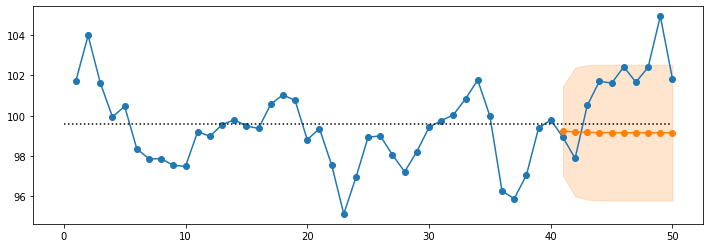

In [16]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  One of the values seems to fall outside of the confidence intervals.

**(d)**  See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 1)   Log Likelihood                 -56.586
Method:                           mle   S.D. of innovations              0.979
Date:                Wed, 13 May 2020   AIC                            121.171
Time:                        22:49:27   BIC                            127.927
Sample:                             0   HQIC                           123.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0006      0.551    181.643      0.000      98.922     101.080
ar.L1.y        0.5829      0.142      4.104      0.000       0.305       0.861
ma.L1.y        0.5454      0.125      4.375      0.0

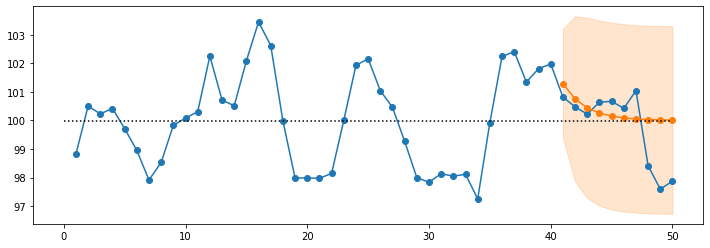

In [17]:
np.random.seed(2001)
Y = generate_arima(phi=0.7, theta=-0.5, n=50) + 100

model = ARIMA(Y[:40], order=(1, 0, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

All values fall within the confidence interval.